In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [44]:
form_img_path = 'images\\form.jpg'
scanned_form_img_path = 'images\\scanned-form.jpg'

Text(0.5, 1.0, 'Scanned Form')

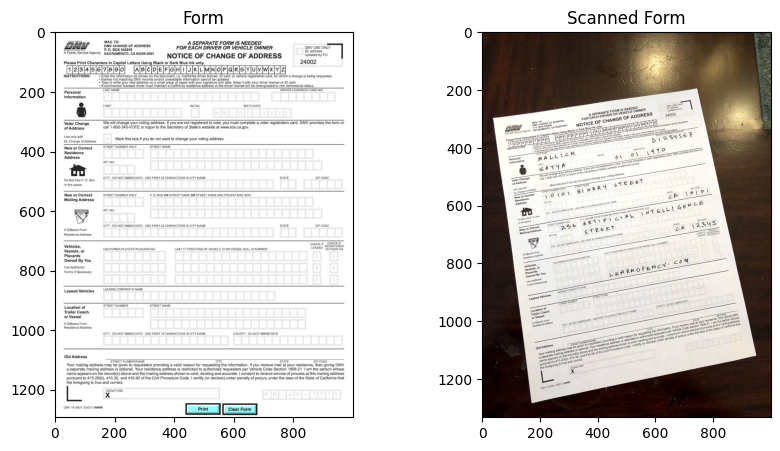

In [45]:
form_img = cv2.imread(form_img_path)
scanned_form_img = cv2.imread(scanned_form_img_path)

form_img = cv2.cvtColor(form_img, cv2.COLOR_BGR2RGB)
scanned_form_img = cv2.cvtColor(scanned_form_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(form_img);plt.title("Form")
plt.subplot(122);plt.imshow(scanned_form_img, cmap="gray");plt.title("Scanned Form")

Text(0.5, 1.0, 'Scanned Form')

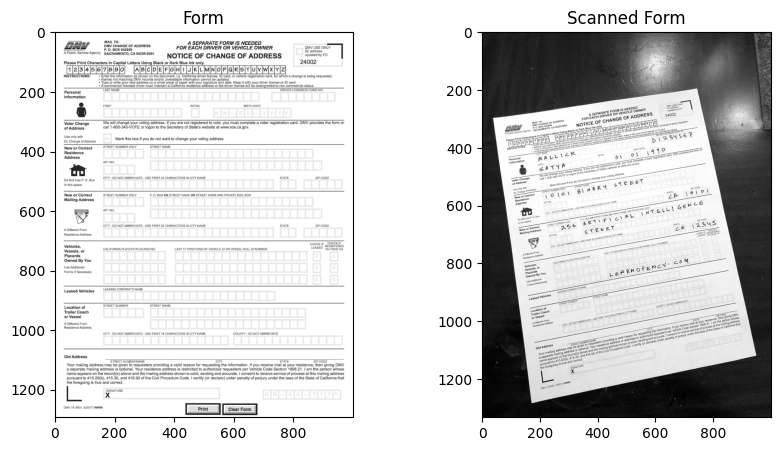

In [46]:
form_img_gray = cv2.cvtColor(form_img, cv2.COLOR_RGB2GRAY)
scanned_form_img_gray = cv2.cvtColor(scanned_form_img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(form_img_gray, cmap="gray");plt.title("Form")
plt.subplot(122);plt.imshow(scanned_form_img_gray, cmap="gray");plt.title("Scanned Form")

In [47]:
max_num_features = 500
orb = cv2.ORB_create(max_num_features)

keypoints1, description1 = orb.detectAndCompute(form_img_gray, None)
keypoints2, description2 = orb.detectAndCompute(scanned_form_img_gray, None)

form_img1 = cv2.drawKeypoints(form_img, keypoints1, outImage=np.array([]), color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scanned_form_img1 = cv2.drawKeypoints(scanned_form_img,  keypoints2, outImage=np.array([]), color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'Keypoints of Scanned Form')

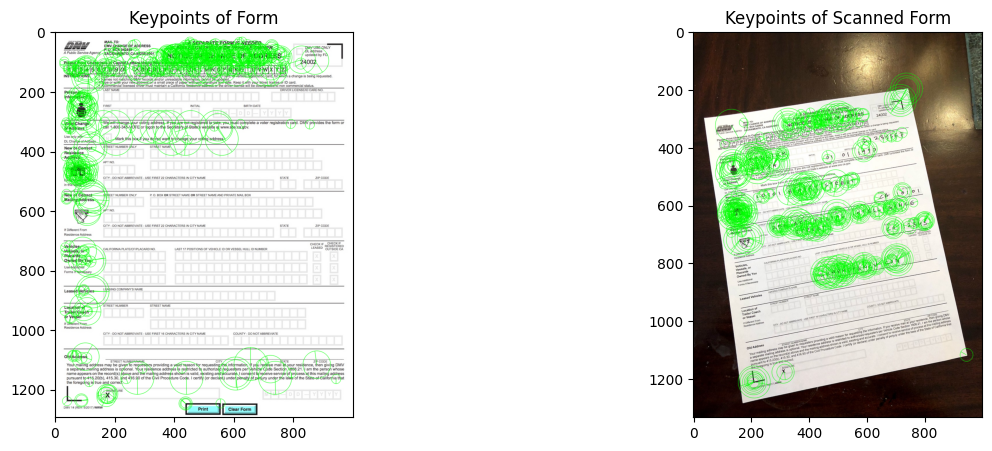

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(121);plt.imshow(form_img1, cmap="gray");plt.title("Keypoints of Form")
plt.subplot(122);plt.imshow(scanned_form_img1, cmap="gray");plt.title("Keypoints of Scanned Form")  

In [49]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = list(matcher.match(description1, description2, None))

matches.sort(key=lambda x: x.distance, reverse=False)
num_good_matches = int(len(matches) * 0.1)
matches = matches[:num_good_matches]

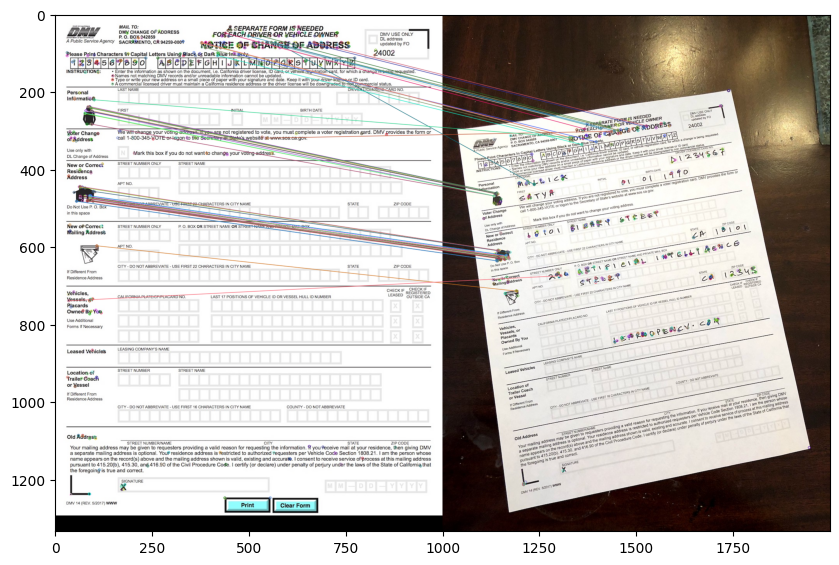

In [50]:
im_matches = cv2.drawMatches(form_img,keypoints1,scanned_form_img,keypoints2,matches, None)
plt.figure(figsize=(10,7))
plt.imshow(im_matches)

In [51]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
print(h)

[[ 1.39505012e+00 -2.03982809e-01 -6.33954212e+00]
 [ 2.19513290e-01  1.51700809e+00 -4.79626529e+02]
 [-6.80384520e-05  1.28362012e-04  1.00000000e+00]]


Text(0.5, 1.0, 'Doc Image')

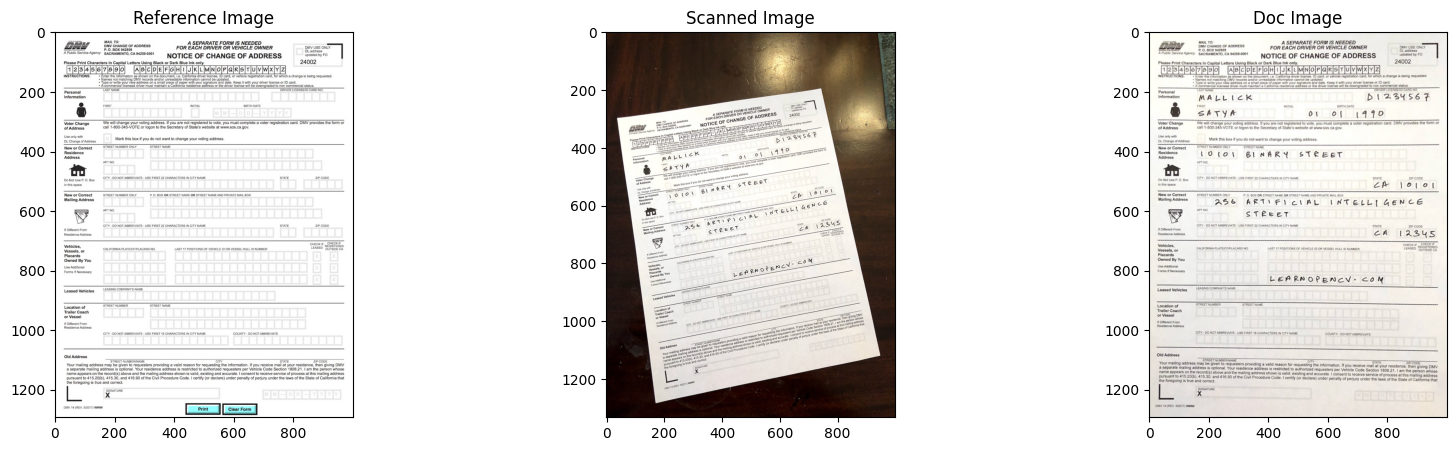

In [52]:
height, width, channels = form_img.shape

scanned_doc = cv2.warpPerspective(scanned_form_img, h, (width,height))

plt.figure(figsize=(20,5))
plt.subplot(131);plt.imshow(form_img);plt.title("Reference Image")
plt.subplot(132);plt.imshow(scanned_form_img);plt.title("Scanned Image")
plt.subplot(133);plt.imshow(scanned_doc);plt.title("Doc Image")